### Agenda:
What are the main characteristics which have the most impact on the car price


In [1]:
import pandas as pd
import numpy as np

In [2]:
path='https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'

df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# Let see individual Features

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Correlations

In [5]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.163636,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214,-0.099157,0.121454,-0.121454
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458


In [6]:
# Let see specific features
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


#### Relationship between "engine-size" and "price"

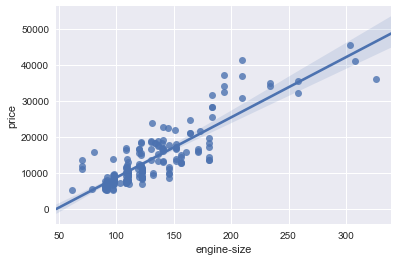

In [7]:
sns.regplot(x="engine-size", y="price",data=df)


Great

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line. E

In [8]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


#### Let see for highway-mpg and price

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


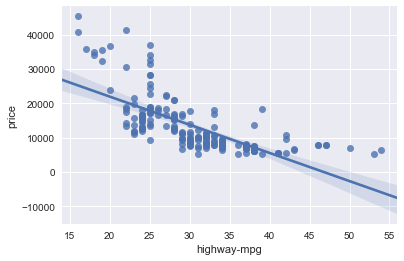

In [10]:
sns.regplot(x="highway-mpg", y="price", data=df)

df[['highway-mpg', 'price']].corr()

As the highway-mpg goes up, the price goes down: this indicates an inverse/ negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704

### Let's see if "Peak-rpm" as a predictor variable of "price".

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


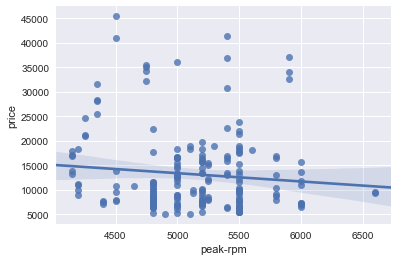

In [11]:
sns.regplot(x="peak-rpm", y="price", data=df)
df[['peak-rpm','price']].corr()

##### It shows very weak correlation

Lets find for  x="stroke", y="price" 

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


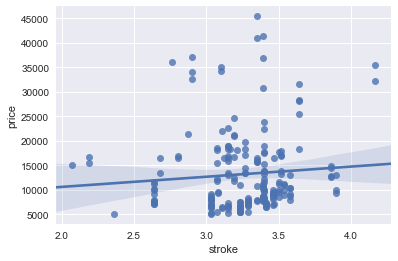

In [13]:
sns.regplot( x="stroke", y="price",data=df)
df[['stroke','price']].corr()

### Let's look at the relationship between "body-style" and "price".

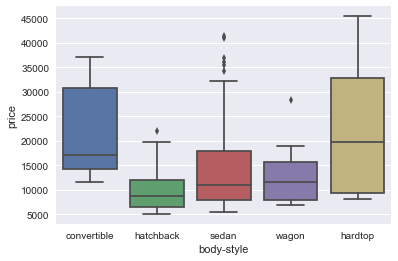

In [14]:
sns.boxplot(x="body-style", y="price", data=df)

#### We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price" :

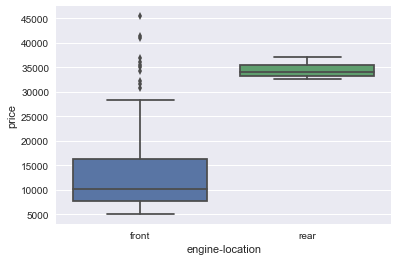

In [15]:
sns.boxplot(x="engine-location", y="price", data=df)

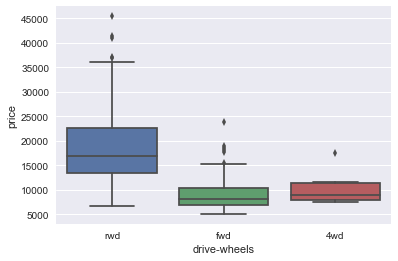

In [16]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

In [18]:
# Descriptive Statistics
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


#### Value Counts
Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

In [19]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [20]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [23]:

# Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts'
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'

drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [24]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


*Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.*


### Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels

In [25]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

*If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.*

we can select the columns 'drive-wheels','body-style' and 'price' , then assign it to the variable "df_group_one".

In [26]:
df_group_one=df[['drive-wheels','body-style','price']]

# grouping results

df_group_one=df_group_one.groupby(['drive-wheels'],as_index= False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [27]:
# grouping results
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


#### Pivot Tables

This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:

In [28]:
grouped_pivot=grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [29]:
grouped_pivot=grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

# Let find the average "price" of each car based on "body-style" ?

In [31]:
# grouping results
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['body-style'],as_index= False).mean()
grouped_test1

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


#### Variables: Drive Wheels and Body Style vs Price
Let's use a heat map to visualize the relationship between Body Style vs Price

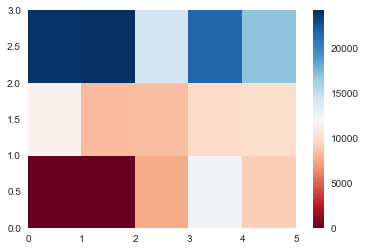

In [32]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style', The default labels convey no useful information to us. Let's change that:

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

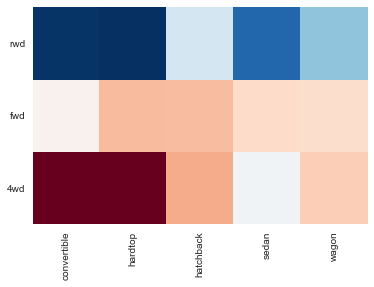

In [33]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

#### Correlation and Causation

##### Correlation: a measure of the extent of interdependence between variables.

##### Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation

#### Pearson Correlation
The Pearson Correlation measures the linear dependence between two variables X and Y. The resulting coefficient is a value between -1 and 1 inclusive, where:

1: total positive linear correlation,
0: no linear correlation, the two variables most likely do not affect each other
-1: total negative linear correlation.
Pearson Correlation is the default method of the function "corr". Like before we can calculate the Pearson correlation of the of the 'int64' or 'float64' variables.


sometimes we would like to know the significant of the correlation estimate.

#### P-value:
What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

- p-value is < 0.001 we say there is strong evidence that the correlation is significant,
- the p-value is < 0.05; there is moderate evidence that the correlation is significant,
- the p-value is < 0.1; there is weak evidence that the correlation is significant, and
- the p-value is > 0.1; there is no evidence that the correlation is significant.

We can obtain this information using "stats" module in the "scipy" library.

#### Wheel-base vs Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [35]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822266  with a P-value of P = 8.07648827073e-20


### Conclusion:
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

### Horsepower vs Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [37]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.690628380448  with a P-value of P = 8.01647746616e-30


In [38]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.751265344052  with a P-value of P = 9.20033551048e-38


In [39]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.83441452577  with a P-value of P = 2.18957723889e-53


Conclusion:
Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

In [40]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.872335167446  with a P-value of P = 9.2654916222e-64


In [41]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.543155383263  with a P-value of P = 8.04918948394e-17


Conclusion:
Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

In [42]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.686571006784  with a P-value of P = 2.32113206557e-29


In [43]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is -0.704692265059  with a P-value of P = 1.74954711445e-31


### ANOVA
### ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

#### Drive Wheels

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

Let's see if different types 'drive-wheels' impact 'price', we group the data.

In [45]:
grouped_test2=df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [46]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [47]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 67.9540650078 , P = 3.39454435772e-23


In [48]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.553316096 , P = 2.23553063557e-23


In [49]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.58068136892 , P = 0.00441149221123


#### Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

#### Continuous numerical variables:

Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base
Bore

#### Categorical variables:

Drive-wheels
AS we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.